In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, chi2

In [2]:
# import data
data = pd.read_csv('../data/curated/fraud/consumer_fraud.csv')

In [4]:
# get correlation
data.corr()

,user_id,transact_amount_perOrder,#daily_orders,#distinct_merchants,fraud_probability,transact_amount_perOrder_sd,#daily_orders_ratio,#distinct_merchants_ratio,transact_amount_perOrder_sd_ratio,transact_amount_perOrder_ratio
user_id,1.000000,0.003034,-0.011776,-0.010591,-0.003738,-0.009271,-0.011487,-0.010304,-0.008352,0.002780
transact_amount_perOrder,0.003034,1.000000,-0.348593,-0.377662,0.777516,0.333693,-0.349440,-0.378466,0.228648,0.972162
#daily_orders,-0.011776,-0.348593,1.000000,0.993035,-0.005280,0.139131,0.998870,0.991874,0.175999,-0.406708
#distinct_merchants,-0.010591,-0.377662,0.993035,1.000000,-0.038652,0.118456,0.991965,0.998859,0.163487,-0.433824
fraud_probability,-0.003738,0.777516,-0.005280,-0.038652,1.000000,0.594985,-0.005738,-0.039051,0.536615,0.798356
transact_amount_perOrder_sd,-0.009271,0.333693,0.139131,0.118456,0.594985,1.000000,0.138166,0.117546,0.952310,0.357501
#daily_orders_ratio,-0.011487,-0.349440,0.998870,0.991965,-0.005738,0.138166,1.000000,0.993063,0.175042,-0.407655
#distinct_merchants_ratio,-0.010304,-0.378466,0.991874,0.998859,-0.039051,0.117546,0.993063,1.000000,0.162572,-0.434728
transact_amount_perOrder_sd_ratio,-0.008352,0.228648,0.175999,0.163487,0.536615,0.952310,0.175042,0.162572,1.000000,0.261385
transact_amount_perOrder_ratio,0.002780,0.972162,-0.406708,-0.433824,0.798356,0.357501,-0.407655,-0.434728,0.261385,1.000000


In [49]:
# split data
train, valtest = train_test_split(data, train_size=0.7, random_state=19260817)
val, test = train_test_split(valtest, train_size=0.5, random_state=19260817)

In [50]:
# select k best
selectk_F = SelectKBest(f_regression, k=8)

selectk_F.fit(train.drop(['user_id', 'fraud_probability'], axis=1), train['fraud_probability'])


SelectKBest(k=8, score_func=<function f_regression at 0x7ff2c26e9ca0>)

In [51]:
# get the ranked feature names and scores
kbest_scores1 = pd.DataFrame({'features': selectk_F.get_feature_names_out(), 'scores': selectk_F.scores_})
kbest_scores1 = kbest_scores1.sort_values('scores', ascending=False)
kbest_scores1

,features,scores
7,transact_amount_perOrder_ratio,44060.561393
0,transact_amount_perOrder,39514.155621
3,transact_amount_perOrder_sd,13292.881996
6,transact_amount_perOrder_sd_ratio,9811.997668
5,#distinct_merchants_ratio,47.885663
2,#distinct_merchants,47.054948
4,#daily_orders_ratio,3.973145
1,#daily_orders,3.683891


In [52]:
SELECTED_FEATURES = kbest_scores1['features'][:4]

In [53]:
import matplotlib.pyplot as plt

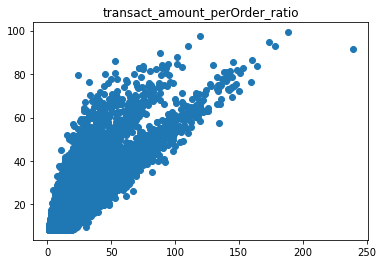

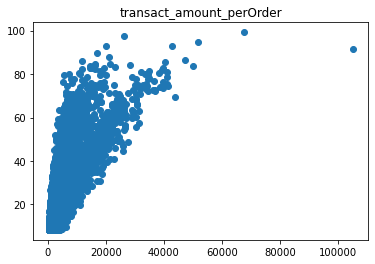

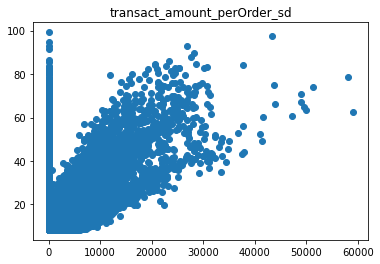

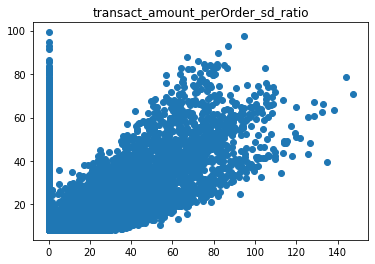

In [57]:
for selected_feature in SELECTED_FEATURES:
    plt.scatter(data[selected_feature], data['fraud_probability'])
    plt.title(selected_feature)
    plt.show()

# RFR

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
rfr = RandomForestRegressor(random_state=19260817)

In [16]:
rfr.fit(train[list(SELECTED_FEATURES)], train['fraud_probability'])

RandomForestRegressor(random_state=19260817)

In [17]:
rfr.score(train[list(SELECTED_FEATURES)], train['fraud_probability'])

0.9739034544893413

In [18]:
rfr.score(val[list(SELECTED_FEATURES)], val['fraud_probability'])

0.7908097661899058

In [19]:
rfr.score(test[list(SELECTED_FEATURES)], test['fraud_probability'])

0.787927192190421

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(train[list(SELECTED_FEATURES)], train['fraud_probability'])

LinearRegression()

In [23]:
lr.score(train[list(SELECTED_FEATURES)], train['fraud_probability'])

0.7627005646779915

In [24]:
lr.score(val[list(SELECTED_FEATURES)], val['fraud_probability'])

0.7364626735151119

In [25]:
lr.score(test[list(SELECTED_FEATURES)], test['fraud_probability'])

0.7336531870989735

# Neural Network

In [26]:
from sklearn.neural_network import MLPRegressor

In [58]:
mlp = MLPRegressor(hidden_layer_sizes=(2), random_state=19260817)

In [59]:
mlp.fit(train[list(SELECTED_FEATURES)], train['fraud_probability'])

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=2, random_state=19260817)

In [60]:
mlp.score(train[list(SELECTED_FEATURES)], train['fraud_probability'])

0.35070874138999175

In [61]:
mlp.score(val[list(SELECTED_FEATURES)], val['fraud_probability'])

0.3286509177890802

In [62]:
mlp.score(test[list(SELECTED_FEATURES)], test['fraud_probability'])

0.3111252798067978